Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.



In [1]:
# import all liberaries and dependencines for data frame
import numpy as np
import pandas as pd

# import all liberaries and dependencines for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform

# import all liberaries and dependencines for machine learning
import datetime as dt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# import all liberaries and dependencines for Clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file
data_dict=pd.read_csv("data-dictionary.csv")
data_dict.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [3]:
coun_data=pd.read_csv("Country-data.csv")
coun_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [5]:
coun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data_dict.shape

(10, 2)

In [7]:
coun_data.shape

(167, 10)

In [8]:
data_dict.describe()

,Column Name,Description
count,10,10
unique,10,10
top,health,Death of children under 5 years of age per 100...
freq,1,1


In [9]:
coun_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
print(coun_data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [11]:
coun_data['exports']=coun_data['exports']*coun_data['gdpp']/100
coun_data['health']=coun_data['health']*coun_data['gdpp']/100
coun_data['imports']=coun_data['imports']*coun_data['gdpp']/100

In [12]:
coun_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


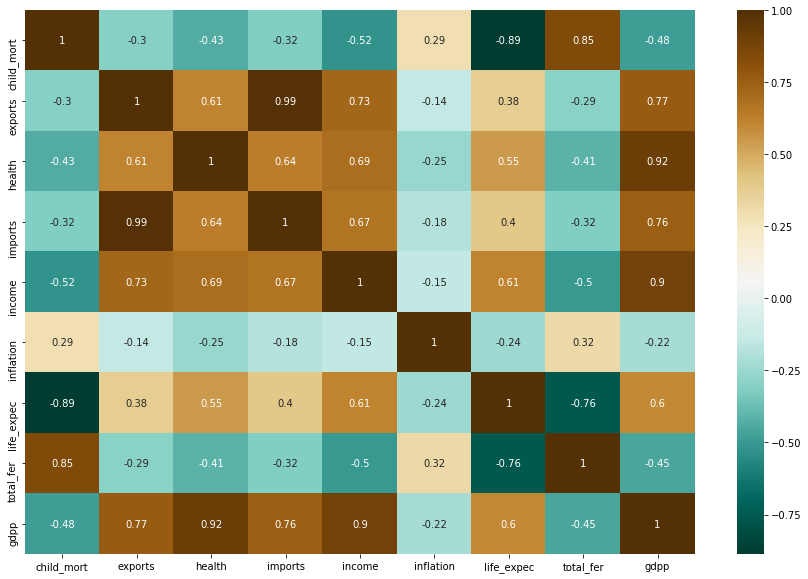

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(coun_data.corr(),annot=True,cmap='BrBG_r')

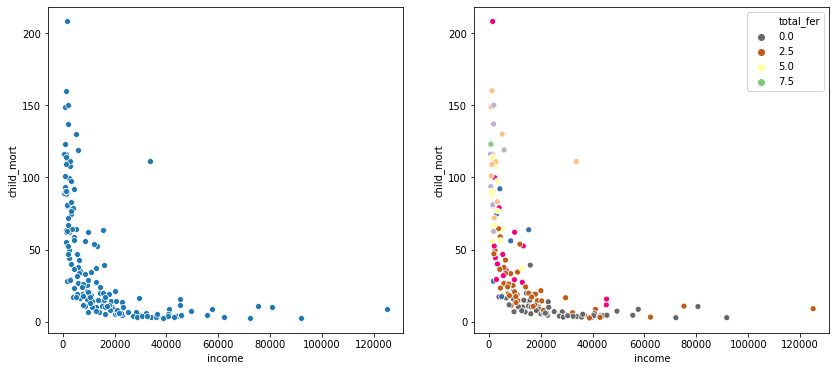

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x='income',y='child_mort',data=coun_data,palette='gnuplot2_r')
plt.subplot(1,2,2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer',data=coun_data,palette='Accent_r')
plt.show()

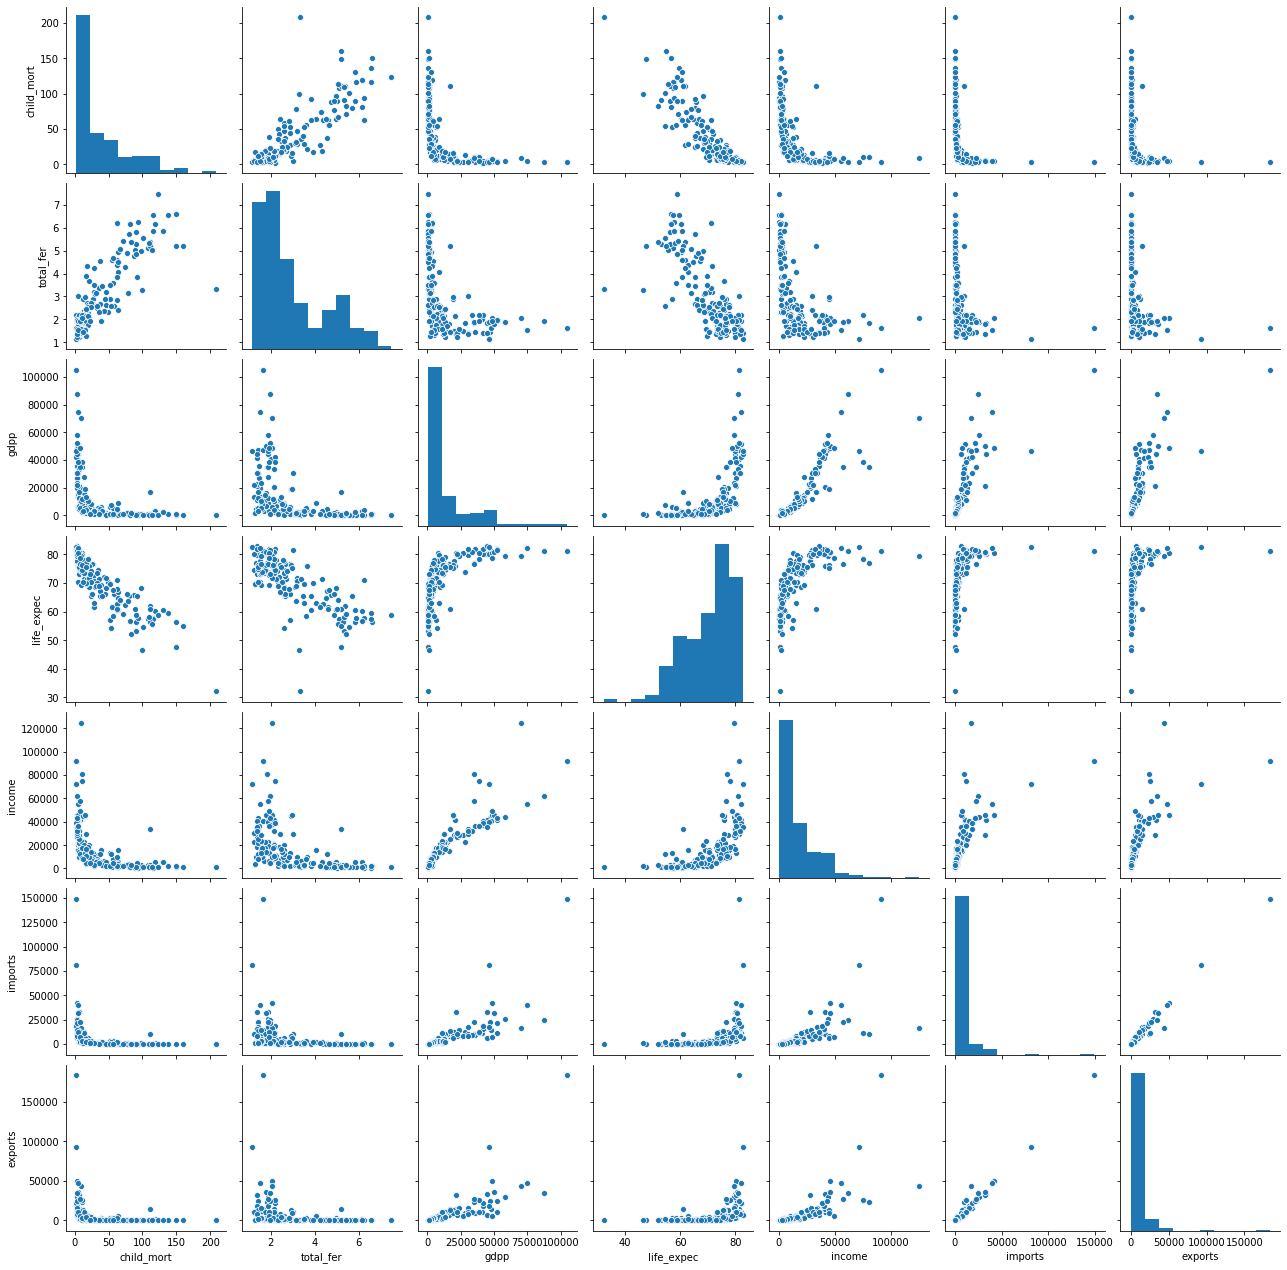

In [15]:
sns.pairplot(coun_data,vars=['child_mort','total_fer','gdpp','life_expec','income','imports','exports'],kind='scatter',
             palette='Accent_r')
plt.show()

In [16]:
Country=coun_data.groupby('country').child_mort.sum().sort_values(ascending=False)

In [17]:
coun_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


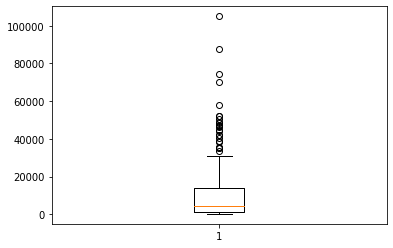

In [18]:
plt.boxplot(coun_data.gdpp)
plt.show()

In [19]:
coun_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [20]:
#Dropping Country field as final dataframe will only contain data columns

df_country_drop = coun_data.copy()
#copying for hirarical clustering usage 
df_country_hir = coun_data.copy()

country = df_country_drop.pop('country')

In [21]:
coun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


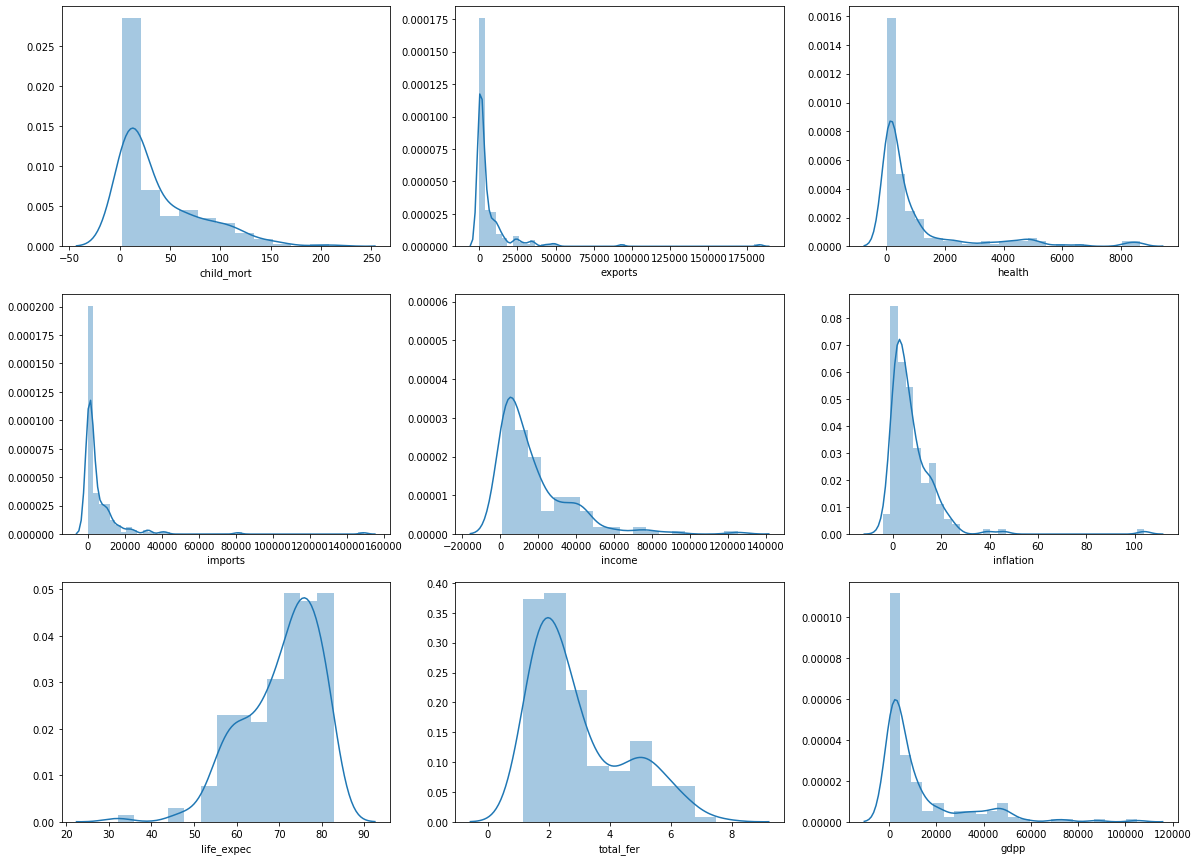

In [22]:
plt.figure(figsize = (20,15))
features = df_country_drop.columns[:]
for j in enumerate(features):
    plt.subplot(3,3,j[0]+1)
    sns.distplot(df_country_drop[j[1]])

In [51]:
# Check the hopkins

#Calculating the Hopkins statistic

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

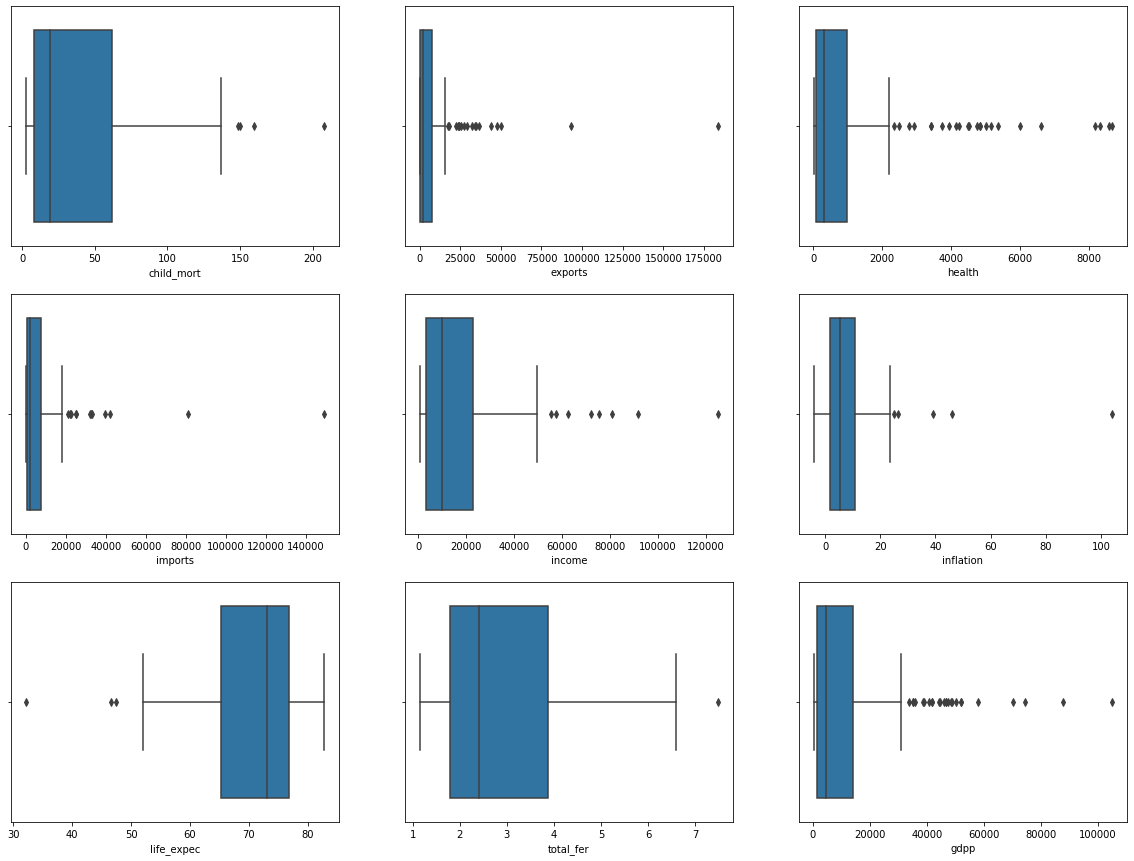

In [23]:
plt.figure(figsize = (20,15))
feature = df_country_drop.columns[:]
for j in enumerate(feature):
    plt.subplot(3,3, j[0]+1)
    sns.boxplot(df_country_drop[j[1]])

In [24]:
scaler=StandardScaler()
df1=scaler.fit_transform(df_country_drop)
# df1

In [25]:
df1=pd.DataFrame(df1,columns=df_country_drop.columns[:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


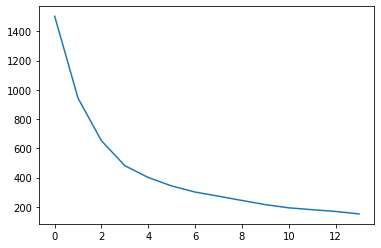

In [26]:
# Elbow Curve Method to find the ideal number of clusters
ecm = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df1)
    ecm.append(model_clus.inertia_)

plt.plot(ecm)
plt.show()

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42673357397704514
For n_clusters=5, the silhouette score is 0.4324001169216119
For n_clusters=6, the silhouette score is 0.39279369617575527
For n_clusters=7, the silhouette score is 0.3068220382518731
For n_clusters=8, the silhouette score is 0.26474839748627066
For n_clusters=9, the silhouette score is 0.30680457357626967
For n_clusters=10, the silhouette score is 0.322283457340312


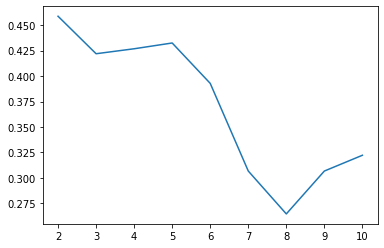

In [27]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
vc = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    vc.append([num_clusters,silhouette_avg])
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

temp = pd.DataFrame(vc)    
plt.plot(temp[0], temp[1])

In [28]:
kmean=KMeans(n_clusters=3,max_iter=50,random_state=50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [29]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [30]:
coun_data['ClusterID']=pd.Series(kmean.labels_)

In [31]:
coun_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [32]:
# Assign the label
#calculating mean of the required columns(child_mort, income, gdpp) for comparison
Cluster_GDPP=pd.DataFrame(coun_data.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(coun_data.groupby(["ClusterID"]).child_mort.mean())
Cluster_income=pd.DataFrame(coun_data.groupby(["ClusterID"]).income.mean())
K_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income], axis=1)
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
0,7979.912088,20.357143,13968.021978
1,48114.285714,5.046429,50178.571429
2,1909.208333,91.610417,3897.354167


In [33]:
K_mean_df.rename(index={0: 'Developing'},inplace=True)
K_mean_df.rename(index={1: 'Developed'},inplace=True)
K_mean_df.rename(index={2: 'Under-developed'},inplace=True)

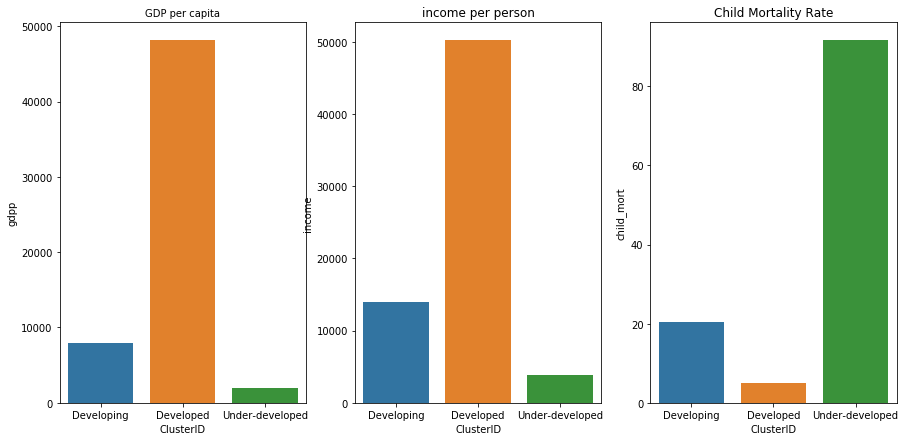

In [53]:
h, axes = plt.subplots(1, 3, figsize=(15,7))

sn=sns.barplot(x=K_mean_df.index,y='gdpp',data=K_mean_df,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=10)

sn=sns.barplot(x=K_mean_df.index,y='income',data=K_mean_df,ax=axes[1])
axes[1].set_title('income per person')

sn=sns.barplot(x=K_mean_df.index,y='child_mort',data=K_mean_df,ax=axes[2])
axes[2].set_title('Child Mortality Rate')

plt.show()

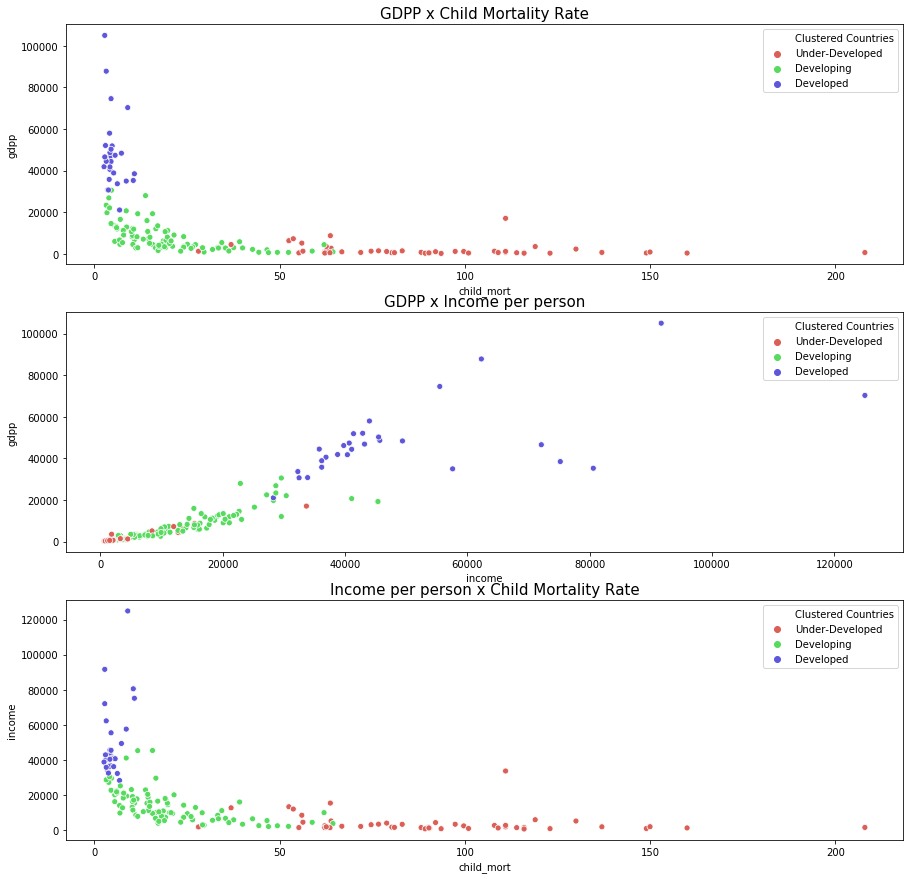

In [35]:
for j,cluster in enumerate(coun_data.ClusterID):
    if(cluster==0):
        coun_data.loc[j,'Clustered Countries']='Developing'
    elif(cluster==1):
        coun_data.loc[j,'Clustered Countries']='Developed'
    else:
        coun_data.loc[j,'Clustered Countries']='Under-Developed'
        
h, axes = plt.subplots(3, 1, figsize=(15,15))
sn=sns.scatterplot(x='child_mort',y='gdpp',hue='Clustered Countries',legend='full',data=coun_data,palette=sns.color_palette("hls", 3),ax=axes[0])
axes[0].set_title('GDPP x Child Mortality Rate',fontsize=15)
sn=sns.scatterplot(x='income',y='gdpp',hue='Clustered Countries',legend='full',data=coun_data,palette=sns.color_palette("hls", 3),ax=axes[1])
axes[1].set_title('GDPP x Income per person',fontsize=15)
sn=sns.scatterplot(x='child_mort',y='income',hue='Clustered Countries',legend='full',data=coun_data,palette=sns.color_palette("hls", 3),ax=axes[2])
axes[2].set_title('Income per person x Child Mortality Rate',fontsize=15)
plt.show()

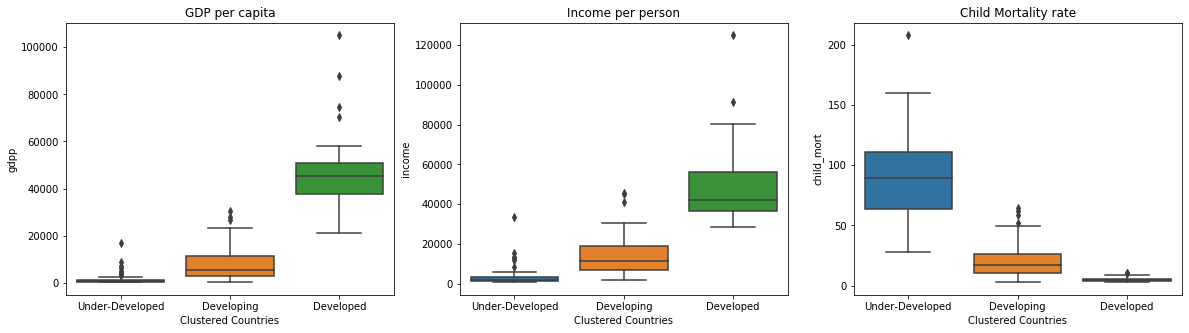

In [36]:
h, axes = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(x='Clustered Countries',y='gdpp',data=coun_data,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=12)
sns.boxplot(x='Clustered Countries',y='income',data=coun_data,ax=axes[1])
axes[1].set_title('Income per person',fontsize=12)
sns.boxplot(x='Clustered Countries',y='child_mort',data=coun_data,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=12)
plt.show()

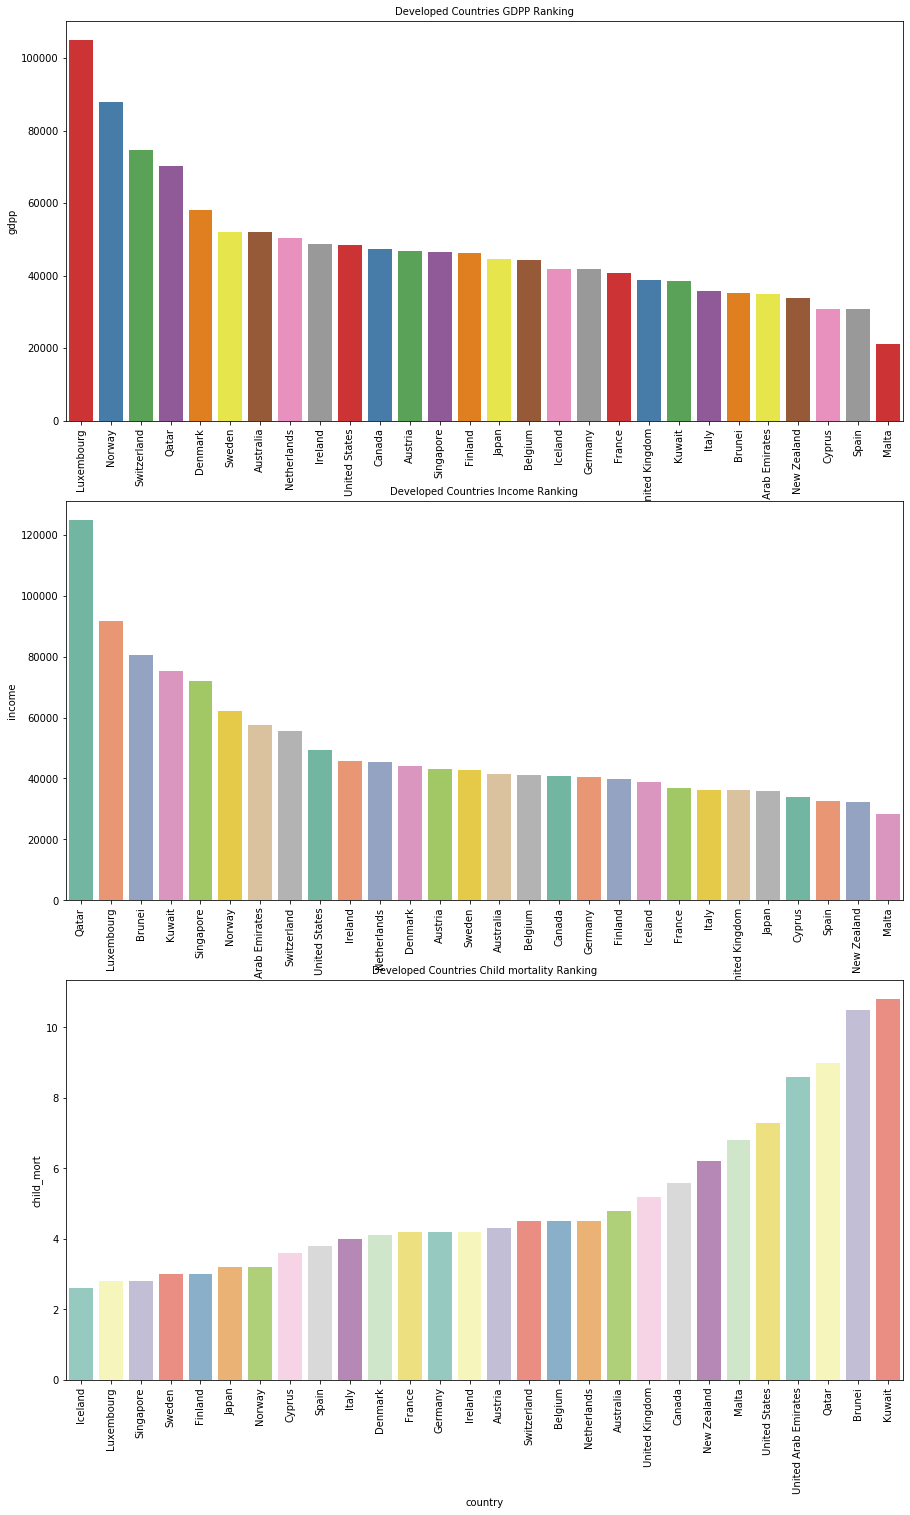

In [37]:
h, axes = plt.subplots(3, 1, figsize=(15,25))

gdp_developed=coun_data[coun_data['Clustered Countries']=='Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developed,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developed Countries GDPP Ranking',fontsize=10)

income_developed=coun_data[coun_data['Clustered Countries']=='Developed'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_developed,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developed Countries Income Ranking',fontsize=10)

child_developed=coun_data[coun_data['Clustered Countries']=='Developed'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_developed,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developed Countries Child mortality Ranking',fontsize=10)
plt.show()

# Hierarchical Clustering

In [38]:
# # Creating Scaler Object
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# df2=scaler.fit_transform(df_country_drop)
# df2

In [39]:
df2 = df1.copy()

In [40]:
# df2=pd.DataFrame(df1,columns=coun_data.columns[:])
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Single Linkage

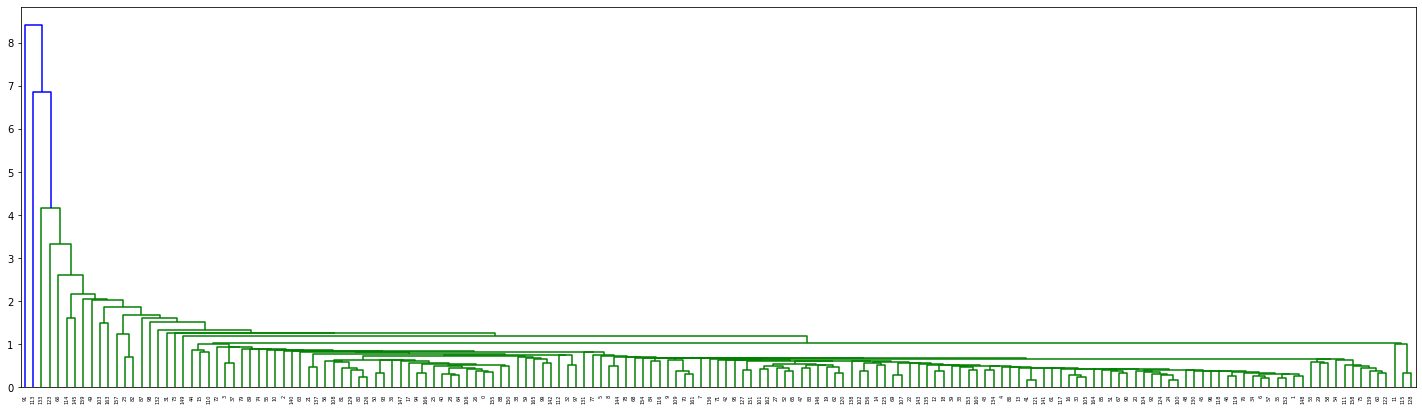

In [42]:
merge=linkage(df2,method='single',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(merge)

In [43]:
coun_data.isnull().any()

country                False
child_mort             False
exports                False
health                 False
imports                False
income                 False
inflation              False
life_expec             False
total_fer              False
gdpp                   False
ClusterID              False
Clustered Countries    False
dtype: bool

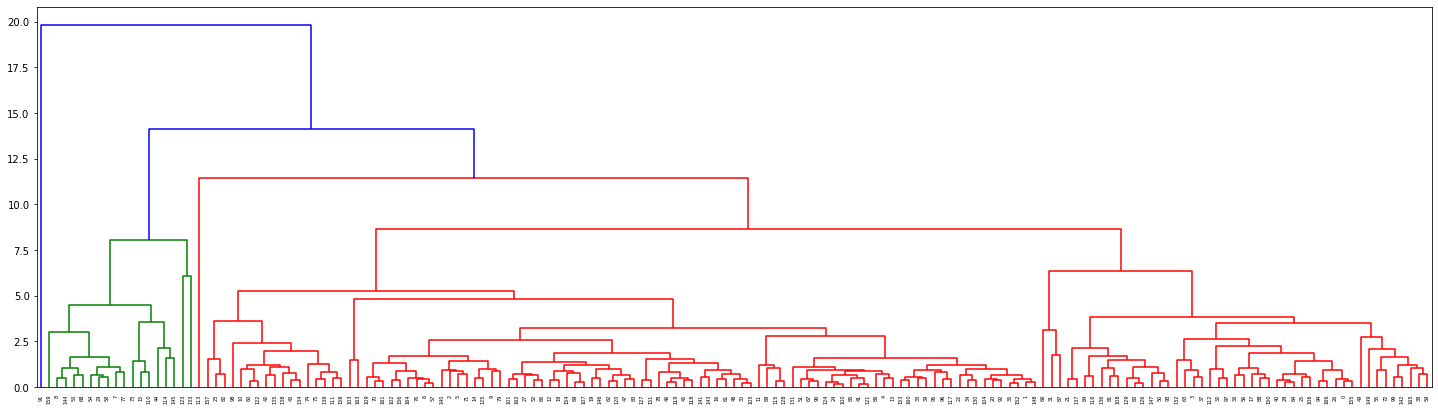

In [44]:
merge=linkage(df2,method='complete',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(merge)

In [46]:
cluster_labels = cut_tree(merge, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# assign cluster labels
df_country_hir['cluster_labels'] = cluster_labels
df_country_hir.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [48]:
Cluster_GDPP_H=pd.DataFrame(df_country_hir.groupby(["cluster_labels"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(df_country_hir.groupby(["cluster_labels"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(df_country_hir.groupby(["cluster_labels"]).income.mean())
H_mean_df = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)
H_mean_df

,gdpp,child_mort,income
cluster_labels,,,
0,7551.445946,42.630405,12641.641892
1,52355.555556,4.388889,50027.777778
2,105000.000000,2.800000,91700.000000


In [50]:
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
Developing,7979.912088,20.357143,13968.021978
Developed,48114.285714,5.046429,50178.571429
Under-developed,1909.208333,91.610417,3897.354167
